In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
import numpy as np

In [3]:
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
train = pd.read_csv('titanic/train.csv')

In [5]:
test = pd.read_csv('titanic/test.csv')

In [6]:
mapping = {'Don': 'Aristocratic', 'Mme': 'Miss', 'Ms': 'Miss', 'Dr': 'Aristocratic',
    'Major': 'Aristocratic', 'Lady': 'Aristocratic', 'Sir': 'Aristocratic', 
    'Mlle': 'Miss', 'Col': 'Aristocratic', 'Capt': 'Aristocratic', 'Rev': 'Aristocratic',
    'Countess': 'Aristocratic', 'Jonkheer': 'Aristocratic', 'Dona': 'Aristocratic'}

In [7]:
def populate_embarked(df):
    embarked = df.groupby('Embarked').count()['PassengerId']
    embarked_max = embarked[embarked == embarked.max()].index[0]
    df.loc[df['Embarked'].isnull(), 'Embarked'] = embarked_max
    return df

In [8]:
def set_titles(df, mapping):
    df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.')
    df.replace({'Title': mapping}, inplace=True)
    return df

In [9]:
def populate_age(df):
    age_med = df.groupby('Title')['Age'].median()
    for title, age in age_med.iteritems():
        filter_age = df['Age'].isnull()
        filter_title = df['Title'] == title
        df.loc[filter_age & filter_title, 'Age'] = age
    return df

In [10]:
train = populate_embarked(train)

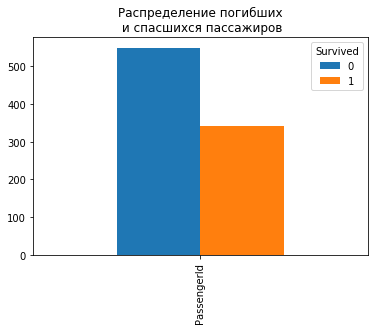

In [181]:
train.pivot_table(values='PassengerId', columns='Survived', aggfunc='count').plot(kind='bar', title='Распределение погибших\n и спасшихся пассажиров')

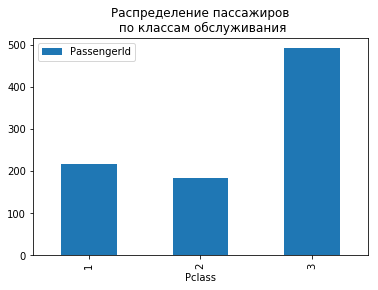

In [182]:
train.pivot_table(values='PassengerId', index='Pclass', aggfunc='count').plot.bar(title='Распределение пассажиров\n по классам обслуживания')

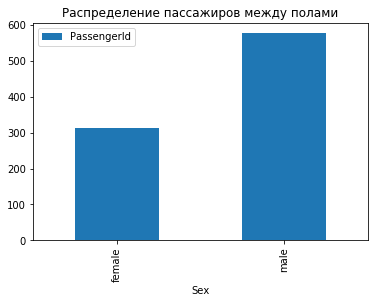

In [183]:
train.pivot_table(values='PassengerId', index='Sex', aggfunc='count').plot.bar(title='Распределение пассажиров между полами')

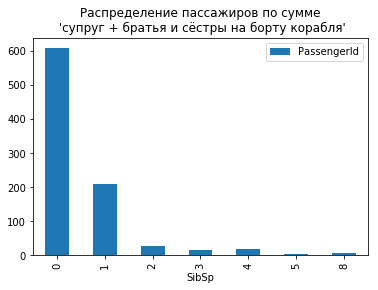

In [184]:
train.pivot_table(values='PassengerId', index='SibSp', aggfunc='count').plot.bar(title="Распределение пассажиров по сумме\n 'супруг + братья и сёстры на борту корабля'")

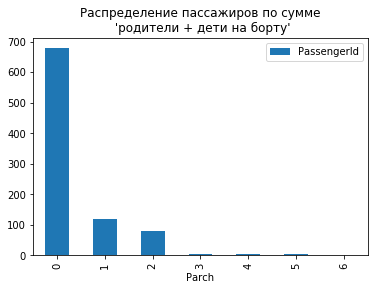

In [185]:
train.pivot_table(values='PassengerId', index='Parch', aggfunc='count').plot.bar(title="Распределение пассажиров по сумме\n 'родители + дети на борту'")

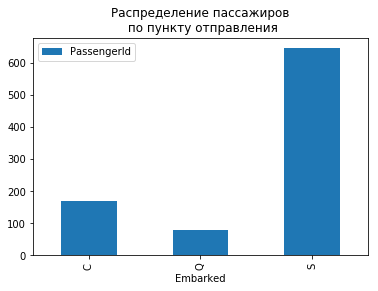

In [186]:
train.pivot_table(values='PassengerId', index='Embarked', aggfunc='count').plot.bar(title="Распределение пассажиров\n по пункту отправления")

Распределение пассажиров по возрастам

/home/feargate/projects/ds1/ds1/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/feargate/projects/ds1/ds1/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


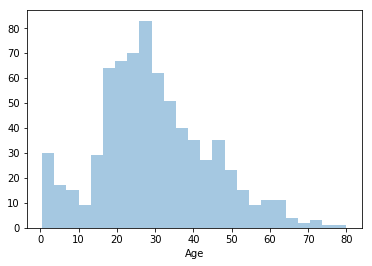

In [187]:
sns.distplot(train['Age'], bins=25, kde=False)

Распределение пассажиров по стоимости билетов

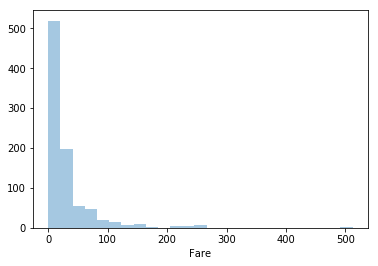

In [188]:
sns.distplot(train['Fare'], bins=25, kde=False)

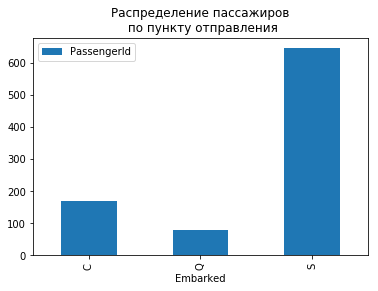

In [189]:
train.pivot_table(values='PassengerId', index='Embarked', aggfunc='count').plot.bar(title="Распределение пассажиров\n по пункту отправления")

Следующий график подтверждает теорию, что чем выше класс каюты пассажира — тем больше шансы выжить.

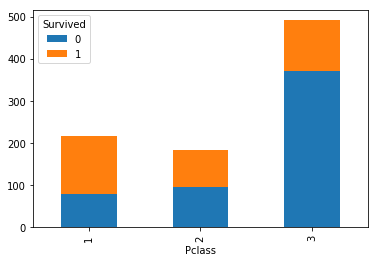

In [190]:
train.pivot_table(values='PassengerId', columns='Survived', index='Pclass', aggfunc='count').plot.bar(stacked=True)

Сравним шансы выжить у мужчин и женщин

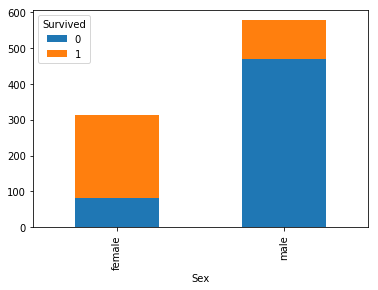

In [191]:
train.pivot_table(values='PassengerId', columns='Survived', index='Sex', aggfunc='count').plot.bar(stacked=True)

Теперь взглянем на шансы выжить у пассажиров из различных портов отправления

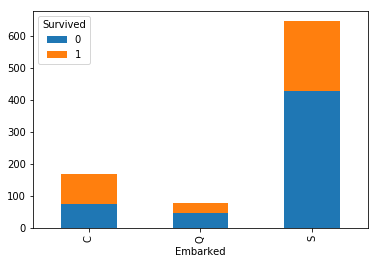

In [192]:
train.pivot_table(values='PassengerId', columns='Survived', index='Embarked', aggfunc='count').plot.bar(stacked=True)

распределением пассажиров разных классов между портами

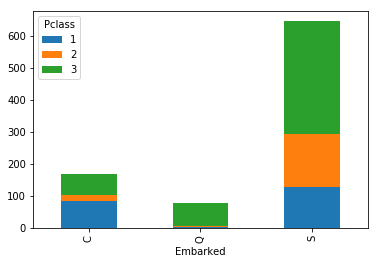

In [193]:
train.pivot_table(values='PassengerId', columns='Pclass', index='Embarked', aggfunc='count').plot.bar(stacked=True)

Также можно проверить гипотезу, что выживают более молодые, т.к. они быстрее двигаются, лучше плавают и т.д.

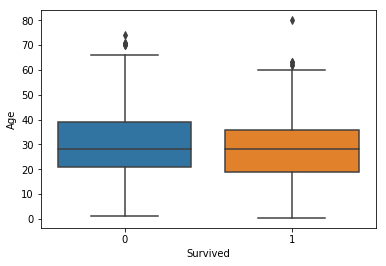

In [194]:
sns.boxplot(x='Survived', y='Age', data=train)

Как видно, явная зависимость здесь не просматривается.

Теперь при помощи другого вида графика посмотрим на наличие возможных статистических связей между признаками объектов. Можно сделать предварительные выводы. В частности, что шансы выжить уменьшаются с ростом класса и возраст — очень слабый признак для построения модели. Также можно обнаружить и другие закономерности. Между возрастом и классом существует отрицательная корреляция, что, скорее всего, связано с более возрастные пассажиры чаще могли себе позволить более дорогую каюту. Кроме того, стоимость билета и класс тесно связаны (высокий коэффициент корреляции), что вполне ожидаемо.

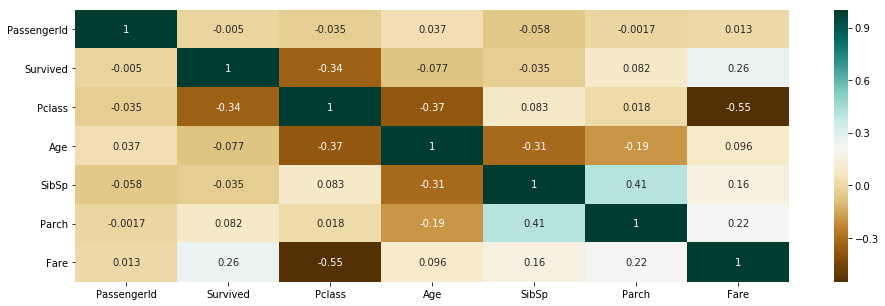

In [195]:
plt.figure(figsize = (16,5))
sns.heatmap(train.corr(),cmap="BrBG",annot=True)

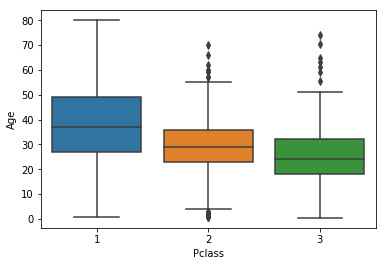

In [196]:
sns.boxplot(x='Pclass', y='Age', data=train)

In [197]:
train.loc[train['Fare'] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


In [198]:
train.loc[train['Fare'] == 0]['Fare']

179    0.0
263    0.0
271    0.0
277    0.0
302    0.0
413    0.0
466    0.0
481    0.0
597    0.0
633    0.0
674    0.0
732    0.0
806    0.0
815    0.0
822    0.0
Name: Fare, dtype: float64

Заменим нулевые значения цены билета на средние для класса

In [200]:
train.groupby('Pclass')['Fare'].median()

Pclass
1    60.2875
2    14.2500
3     8.0500
Name: Fare, dtype: float64

In [11]:
fare_med = train.groupby('Pclass')['Fare'].median()

In [202]:
fare_med

Pclass
1    60.2875
2    14.2500
3     8.0500
Name: Fare, dtype: float64

In [12]:
for pclass, fare in fare_med.iteritems():
    filter_fare = train['Fare'] == 0
    filter_pclass = train['Pclass'] == pclass
    train.loc[filter_fare & filter_pclass, 'Fare'] = fare

In [13]:
train.loc[train['Fare'] == 0]['Fare']

Series([], Name: Fare, dtype: float64)

In [14]:
train = set_titles(train, mapping)
train = populate_age(train)

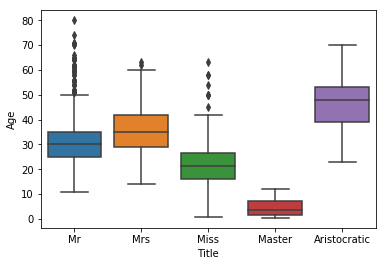

In [225]:
sns.boxplot(x='Title', y='Age', data=train)

Процент выживаемости в зависимости от "Титула"

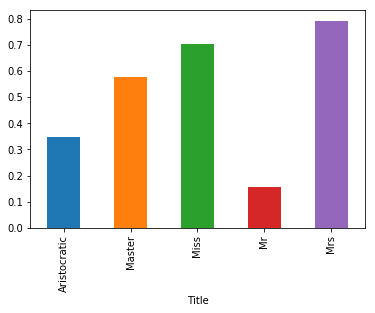

In [230]:
train.groupby('Title').mean()['Survived'].plot.bar()

In [15]:
train['Family'] = train['SibSp'] + train['Parch']

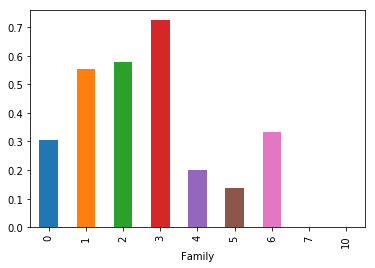

In [255]:
train.groupby('Family').mean()['Survived'].plot.bar()

Text(0.5, 1.0, 'Кол-во родственников на борту корабля u Male')

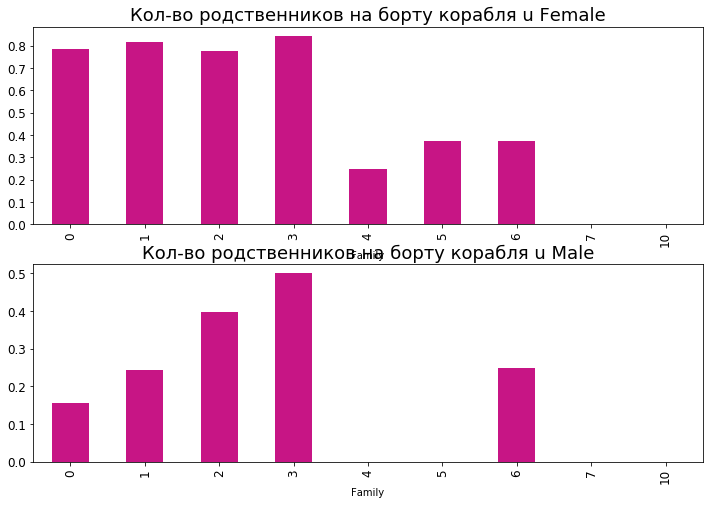

In [262]:
fig, axarr = plt.subplots(2, 1, figsize=(12, 8))

train.loc[train['Sex'] == 'female'].groupby('Family').mean()['Survived'].plot.bar(
    ax=axarr[0], fontsize=12, color='mediumvioletred'
)
axarr[0].set_title("Кол-во родственников на борту корабля u Female", fontsize=18)

train.loc[train['Sex'] == 'male'].groupby('Family').mean()['Survived'].plot.bar(
    ax=axarr[1], fontsize=12, color='mediumvioletred'
)
axarr[1].set_title("Кол-во родственников на борту корабля u Male", fontsize=18)

In [16]:
train['isFamily'] = np.where(train['Family'] > 0, 1, 0)

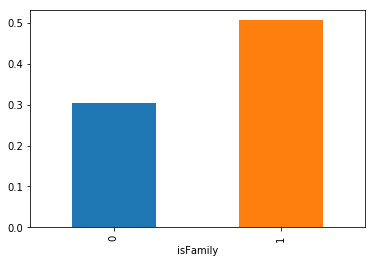

In [279]:
train.groupby('isFamily').mean()['Survived'].plot.bar()

In [17]:
train['isCabin'] = np.where(train['Cabin'].notna(), 1, 0)

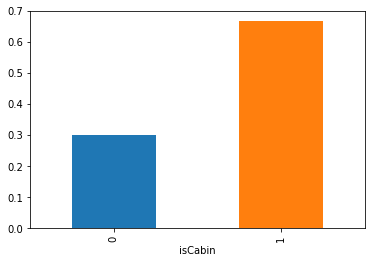

In [275]:
train.groupby('isCabin').mean()['Survived'].plot.bar()

Посмотрим на выживаемость в зависимости от наличия номера каюты в целом по всем пассажирам и в разрезе по классам и полу. Первая строчка 1 класс и т.д.

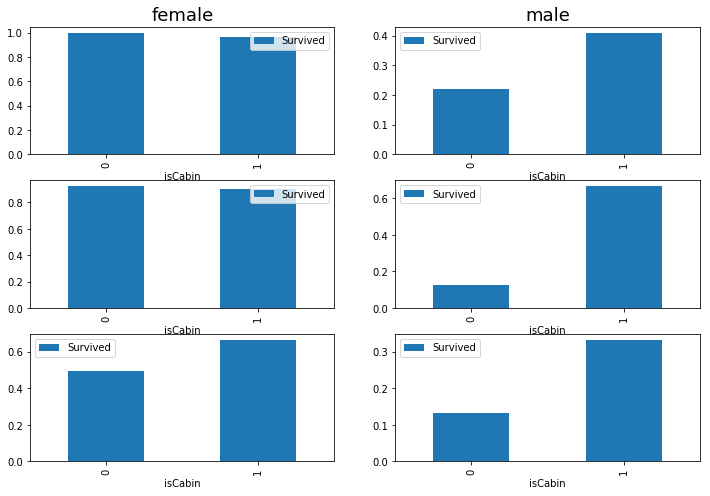

In [303]:
fig, axarr = plt.subplots(3, 2, figsize=(12, 8))
train.loc[train['Sex']=='female'].loc[train['Pclass']==1].pivot_table('Survived','isCabin').plot.bar(ax=axarr[0][0])
axarr[0][0].set_title("female", fontsize=18)
train.loc[train['Sex']=='female'].loc[train['Pclass']==2].pivot_table('Survived','isCabin').plot.bar(ax=axarr[1][0])
train.loc[train['Sex']=='female'].loc[train['Pclass']==3].pivot_table('Survived','isCabin').plot.bar(ax=axarr[2][0])
axarr[0][1].set_title("male", fontsize=18)
train.loc[train['Sex']=='male'].loc[train['Pclass']==1].pivot_table('Survived','isCabin').plot.bar(ax=axarr[0][1])
train.loc[train['Sex']=='male'].loc[train['Pclass']==2].pivot_table('Survived','isCabin').plot.bar(ax=axarr[1][1])
train.loc[train['Sex']=='male'].loc[train['Pclass']==3].pivot_table('Survived','isCabin').plot.bar(ax=axarr[2][1])

In [304]:
train = train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [316]:
test = populate_embarked(test)
test = set_titles(test, mapping)
test = populate_age(test)

In [318]:
test['Fare'][test['Fare'].isnull()] = test['Fare'].median()

/home/feargate/projects/ds1/ds1/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [319]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Title          418 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 39.3+ KB


In [321]:
test.loc[test['Fare'] == 0]['Fare']

266    0.0
372    0.0
Name: Fare, dtype: float64

In [322]:
for pclass, fare in test.groupby('Pclass')['Fare'].median().iteritems():
    filter_fare = test['Fare'] == 0
    filter_pclass = test['Pclass'] == pclass
    test.loc[filter_fare & filter_pclass, 'Fare'] = fare

In [323]:
test.loc[test['Fare'] == 0]['Fare']

Series([], Name: Fare, dtype: float64)

In [324]:
def set_family(df):
    df['Family'] = df['SibSp'] + df['Parch']
    return df

In [325]:
def set_isfamily(df):
    df['isFamily'] = np.where(df['Family'] > 0, 1, 0)
    return df

In [326]:
test = set_family(test)

In [327]:
test = set_isfamily(test)

In [328]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Title          418 non-null object
Family         418 non-null int64
isFamily       418 non-null int64
dtypes: float64(2), int64(6), object(6)
memory usage: 45.8+ KB


In [333]:
test.sample(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family,isFamily,isCabin
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S,Miss,0,0,0
320,1212,3,"Andersson, Mr. Johan Samuel",male,26.0,0,0,347075,7.7750,NaN,S,Mr,0,0,0
268,1160,3,"Howard, Miss. May Elizabeth",female,22.0,0,0,A. 2. 39186,8.0500,NaN,S,Miss,0,0,0
66,958,3,"Burns, Miss. Mary Delia",female,18.0,0,0,330963,7.8792,NaN,Q,Miss,0,0,0
184,1076,1,"Douglas, Mrs. Frederick Charles (Mary Helene B...",female,27.0,1,1,PC 17558,247.5208,B58 B60,C,Mrs,2,1,1
341,1233,3,"Lundstrom, Mr. Thure Edvin",male,32.0,0,0,350403,7.5792,NaN,S,Mr,0,0,0
362,1254,2,"Ware, Mrs. John James (Florence Louise Long)",female,31.0,0,0,CA 31352,21.0000,NaN,S,Mrs,0,0,0
271,1163,3,"Fox, Mr. Patrick",male,28.5,0,0,368573,7.7500,NaN,Q,Mr,0,0,0
133,1025,3,"Thomas, Mr. Charles P",male,28.5,1,0,2621,6.4375,NaN,C,Mr,1,1,0
390,1282,1,"Payne, Mr. Vivian Ponsonby",male,23.0,0,0,12749,93.5000,B24,S,Mr,0,0,1


In [331]:
def set_iscabin(df):
    df['isCabin'] = np.where(df['Cabin'].notna(), 1, 0)
    return df

In [332]:
test = set_iscabin(test)

In [334]:
result = pd.DataFrame(test['PassengerId'])
test = test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [335]:
le = LabelEncoder()
classes = {}

In [336]:
le.fit(train['Sex'])
classes['Sex'] = le.classes_
train['Sex'] = le.transform(train['Sex'])

le.fit(train['Embarked'])
classes['Embarked'] = le.classes_
train['Embarked'] = le.transform(train['Embarked'])

le.fit(train['Title'])
classes['Title'] = le.classes_
train['Title'] = le.transform(train['Title'])

In [337]:
le.fit(classes['Sex'])
test['Sex'] = le.transform(test['Sex'])

le.fit(classes['Embarked'])
test['Embarked'] = le.transform(test['Embarked'])

le.fit(classes['Title'])
test['Title'] = le.transform(test['Title'])

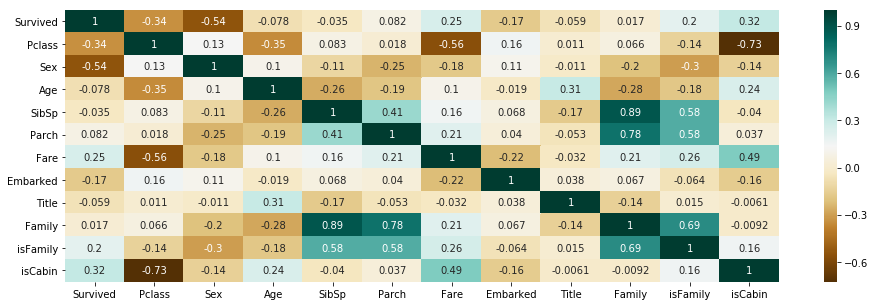

In [338]:
plt.figure(figsize = (16,5))
sns.heatmap(train.corr(),cmap="BrBG",annot=True)

In [339]:
target = train['Survived']
train = train.drop(['Survived'], axis=1)

In [340]:
model_rf = RandomForestClassifier(n_estimators=100)
model_kn = KNeighborsClassifier(n_neighbors=25)

In [341]:
scores = cross_val_score(model_rf, train, target, cv=5)
print(scores)
print(scores.mean())

[0.7877095  0.79888268 0.84269663 0.75842697 0.85875706]
0.809294567284692


In [342]:
scores = cross_val_score(model_kn, train, target, cv=5)
print(scores)
print(scores.mean())

[0.63687151 0.70949721 0.71910112 0.73033708 0.74011299]
0.7071839823362545


In [343]:
model_rf = model_rf.fit(train, target)

In [344]:
predictions = model_rf.predict(test)

In [345]:
result.insert(1, 'Survived', predictions)

In [346]:
result.to_csv('titanic/result2.csv', index=False)